Разделение датасета по аномалиям\
Нужная структура: \
**[час, день недели, месяц, температура, влажность, total_AP_max]**

Трейн на всех:
- + original 
- + original emd 
- + original multi 
- + original multi emd 
- 
- only_days 
- only_days emd
- only_days multi  
- only_days multi emd 
- 
- windows 
- windows emd
- windows multi 
- windows multi emd

Трейн на норм
- + original 
- + original emd 
- + original multi 
- + original multi emd
- 
- only_days 
- only_days emd
- only_days multi  
- only_days multi emd 
- 
- windows 
- windows emd
- windows multi 
- windows multi emd

In [12]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from data_preparation5 import get_data

In [2]:
# wind r'C:/Users/Lomonosova/Downloads/iqds.22.03/iqds/ds_electricity.csv'
# mac r'/Users/veronikalomonosova/Downloads/iqds/ds_electricity.csv'
path = r'C:/Users/Lomonosova/Downloads/iqds.22.03/iqds'
elec = pd.read_csv(path + '/ds_electricity.csv')


c:\users\lomonosova\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (9,10,11,12,13,16,24,25,26,27,28,31,39,40,41,42,43,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# ANOM_3
## OCSVM

In [3]:
anom = elec[elec.io_id == '5fe8db7afec0573c471e065d'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')

In [4]:
anom

,event_timestamp,io_id,Urms,Irms,P,AP_energy,RP_energy,S_energy,NP_energy,Total_P,...,S_energy_max,NP_energy_max,Total_P_max,Total_AP_energy_max,Total_RP_energy_max,Total_S_energy_max,Total_NP_energy_max,Phase_angle_max,Voltage_angle_max,Frequency_max
0,2020-12-27 21:38:14,5fe8db7afec0573c471e065d,"[235.052666666667,235.049111111111,235.1234444...","[0.029,0.029,0.029]","[0,0.00285714285714286,0]","[0.17863,0.17857,0.17853]","[0.00334,0.00351,0.00351]",[],[],0.002857,...,[],[],0.03,0.53573,0.010360000000000001,\N,\N,"[133.4,120.2,171.7]","[0,0,0]",50.0
1,2020-12-27 21:40:14,5fe8db7afec0573c471e065d,"[235.273125,235.27075,235.346125]","[0.029,0.029,0.029]","[-0.00166666666666667,-0.005,0.0025]","[0.17863,0.17857,0.17853]","[0.00334,0.00351,0.00351]",[],[],-0.004167,...,[],[],0.04,0.53573,0.010360000000000001,\N,\N,"[167.5,175.4,137.8]","[0,0,0]",50.0
2,2020-12-27 21:42:14,5fe8db7afec0573c471e065d,"[235.43225,235.43125,235.506375]","[0.029,0.029,0.029]","[0.00142857142857143,-0.00166666666666667,-0.0...","[0.17863,0.17857,0.17853]","[0.00334,0.00351,0.00351]",[],[],-0.001905,...,[],[],0.03,0.53573,0.010360000000000001,\N,\N,"[158.5,162.2,50.5]","[0,0,0]",50.01
3,2020-12-27 21:44:14,5fe8db7afec0573c471e065d,"[235.2805,235.276625,235.35075]","[0.029,0.029,0.029]","[0.00166666666666667,-0.0025,-0.0025]","[0.17863,0.17857,0.17853]","[0.00334,0.00351,0.00351]",[],[],-0.003333,...,[],[],0.03,0.53573,0.010360000000000001,\N,\N,"[135.2,125.5,145.7]","[0,0,0]",49.98
4,2020-12-27 21:46:14,5fe8db7afec0573c471e065d,"[234.65675,234.654375,234.72825]","[0.029,0.029,0.029]","[-0.00166666666666667,0.00125,-0.004]","[0.17863,0.17857,0.17853]","[0.00334,0.00351,0.00351]",[],[],-0.004417,...,[],[],0.03,0.53573,0.010360000000000001,\N,\N,"[103.1,158,149.2]","[0,0,0]",49.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296629,2022-02-28 23:51:38,5fe8db7afec0573c471e065d,"[227.19,226.938,226.84]","[0.7,0.4,1.1]","[143.69,12.89,233.24]","[22508.86369,22006.25379,22208.957]","[248.94189,0.39889,0.24273]",[],[],389.82,...,[],[],396.1,66724.07448,249.58351,\N,\N,"[-22,-81.3,-18.1]","[0,-120.2,119.8]",50.0
296630,2022-02-28 23:53:38,5fe8db7afec0573c471e065d,"[226.456,228.534,226.392]","[0.7,0.4,1.1]","[143.44,13.12,232.94]","[22508.86847,22006.2542,22208.96476]","[248.94189,0.39889,0.24273]",[],[],389.5,...,[],[],395.32,66724.08743,249.58351,\N,\N,"[-22.1,-81.4,-18.5]","[0,-120,119.9]",49.99
296631,2022-02-28 23:55:38,5fe8db7afec0573c471e065d,"[227.138,227.034,227.306]","[0.7,0.4,1.1]","[143.4,12.71,233.88]","[22508.87332,22006.25461,22208.97261]","[248.94189,0.39889,0.24273]",[],[],389.99,...,[],[],392.83,66724.10054,249.58351,\N,\N,"[-22.1,-80.7,-18.6]","[0,-120,120]",49.98
296632,2022-02-28 23:57:38,5fe8db7afec0573c471e065d,"[226.445,228.104,226.823]","[0.7,0.4,1.1]","[144.04,12.18,233.9]","[22508.8781,22006.25502,22208.98038]","[248.94189,0.39889,0.24273]",[],[],390.12,...,[],[],395.63,66724.1135,249.58351,\N,\N,"[-22.2,-80.7,-18.5]","[0,-120.2,119.8]",50.01


### Оригинальные данные, одна размерность, без EMD
Трейн на всех

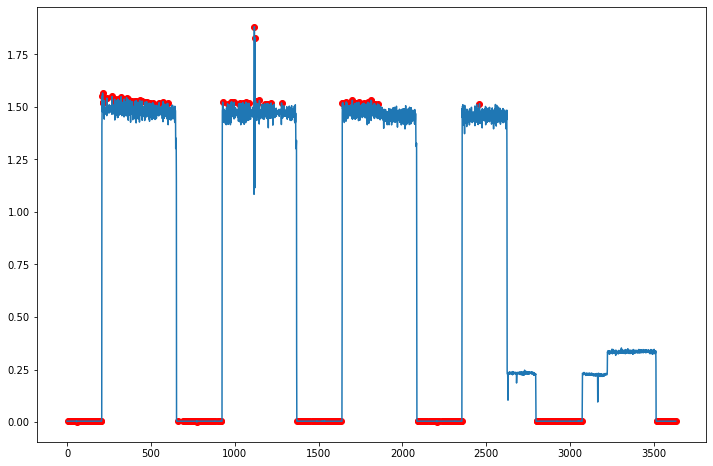

In [14]:
df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2] .reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red')

### Оригинальные данные, одна размерность, с EMD
Трейн на всех

1473
0 1473
209 1370 0
2189
1473 2189
1641 2086 1
2904
2189 2904
2356 2795 2
3620
2904 3620
3074 3512 3


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

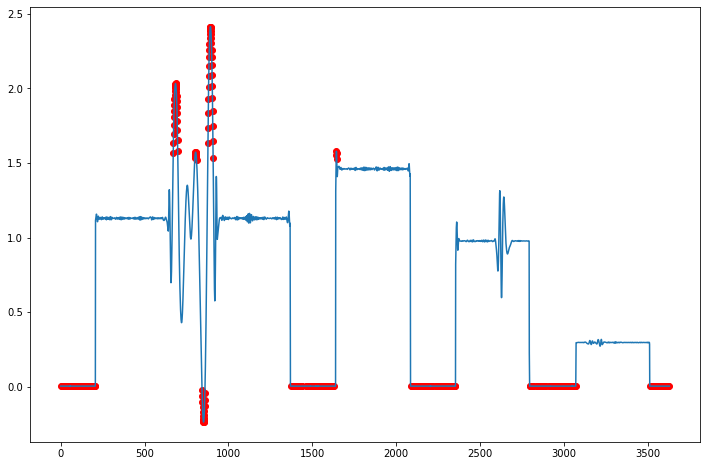

In [15]:
df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red')

### Оригинальные данные, мульти размерность, без EMD
Трейн на всех

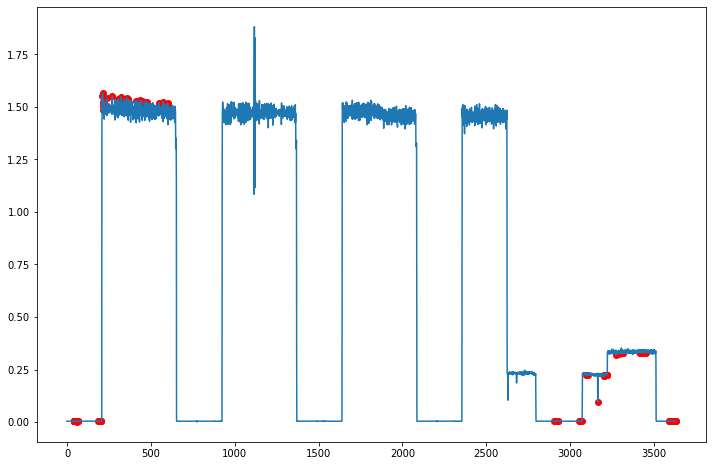

In [16]:
df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, мульти размерность, c EMD 
Трейн на всех

1473
0 1473
209 1370 0
2189
1473 2189
1641 2086 1
2904
2189 2904
2356 2795 2
3620
2904 3620
3074 3512 3


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

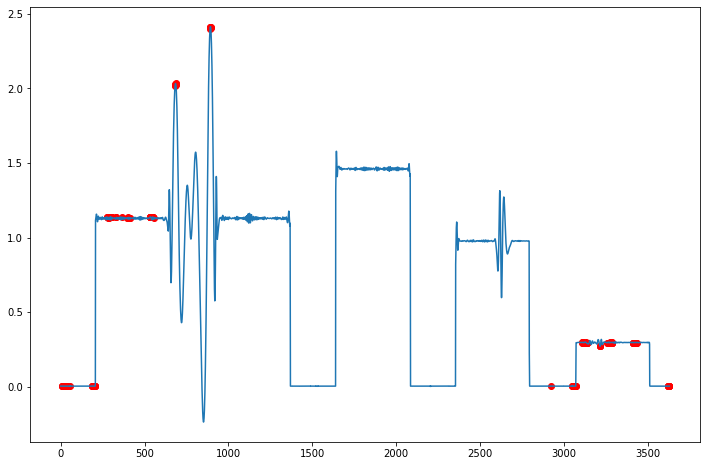

In [17]:
df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, одна размерность, без EMD 
Трейн на норм

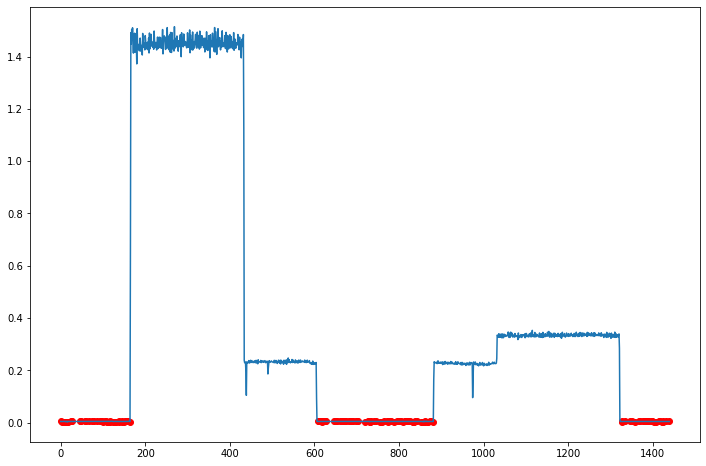

In [19]:
df = get_data(anom.loc[164019 - 730 * 3:164019].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[164019:164019 + 720 * 2].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

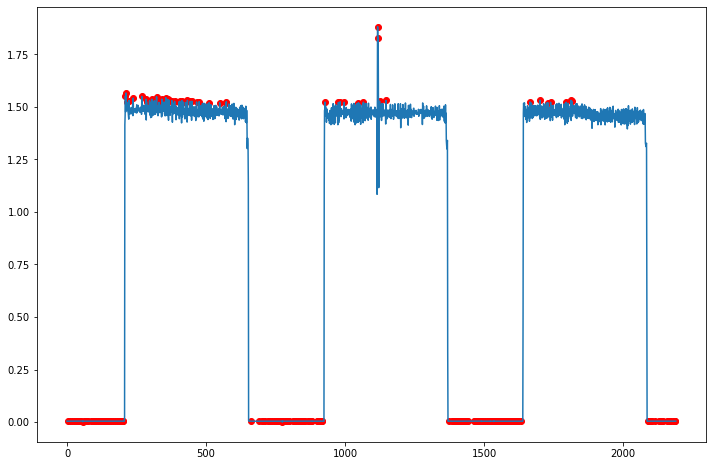

In [20]:
df = get_data(anom.loc[164019 - 730 * 3:164019].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, одна размерность, c EMD 
Трейн на норм

1473
0 1473
209 1370 0
2189
1473 2189
1641 2086 1
1430
0 1430
166 1322 0


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

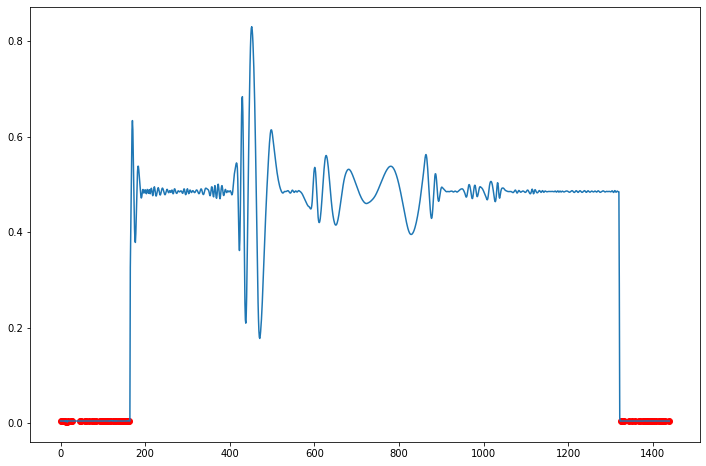

In [21]:
df = get_data(anom.loc[164019 - 730 * 3:164019].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[164019:164019 + 720 * 2].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')


1473
0 1473
209 1370 0
2189
1473 2189
1641 2086 1


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


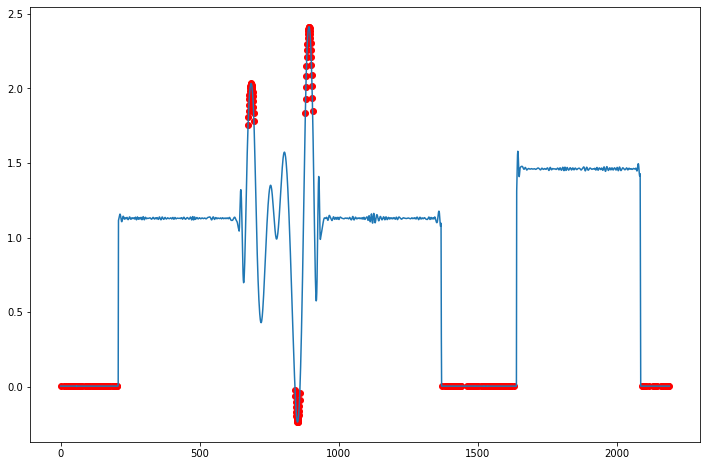

In [22]:
df = get_data(anom.loc[164019 - 730 * 3:164019].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, мульти размерность, без EMD 
Трейн на норм

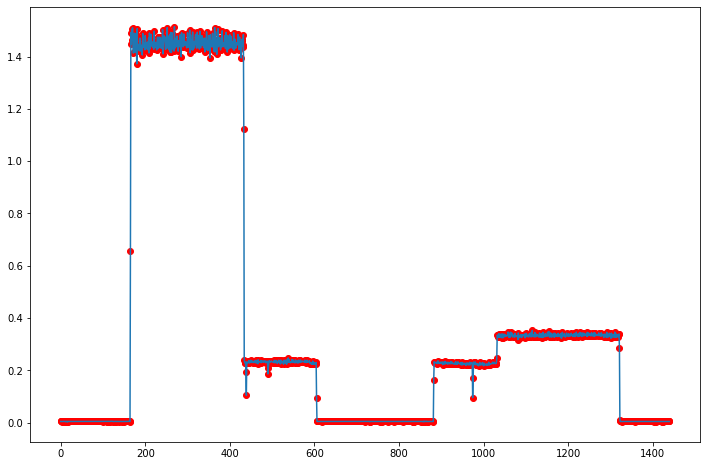

In [30]:
df = get_data(anom.loc[164019 - 730 * 3:164019 ].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[164019:164019 + 720 * 2].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

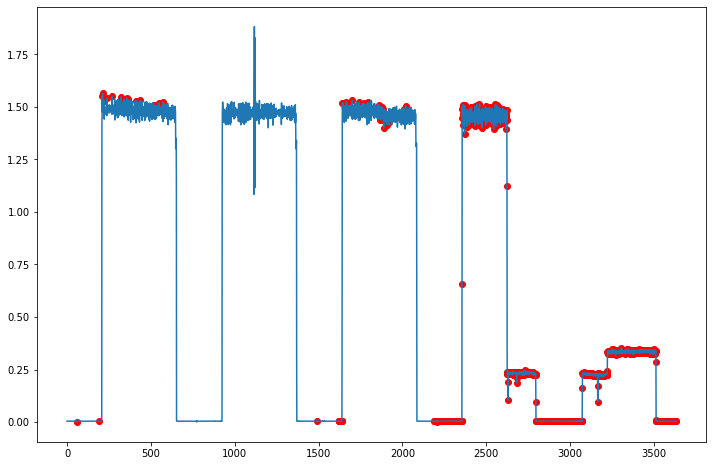

In [31]:
df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, мульти размерность, c EMD 
Трейн на норм

1473
0 1473
209 1370 0
2189
1473 2189
1641 2086 1
1473
0 1473


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

209 1370 0
2189
1473 2189
1641 2086 1
2904
2189 2904
2356 2795 2
3620
2904 3620
3074 3512 3


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


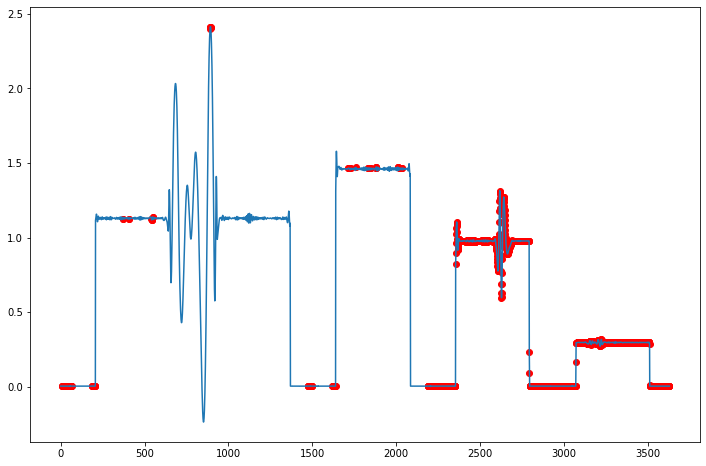

In [32]:
df = get_data(anom.loc[164019 - 730 * 3:164019].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
3639
2919 3639
3095 3639 4
4359
3639 4359
3639 4250 5
5078
4359 5078
4535 4969 6
5798
5078 5798
5254 5689 7
6518
5798 6518
5974 6409 8
7238
6518 7238

C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st


6694 7129 9
7954
7238 7954
7414 7845 10


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


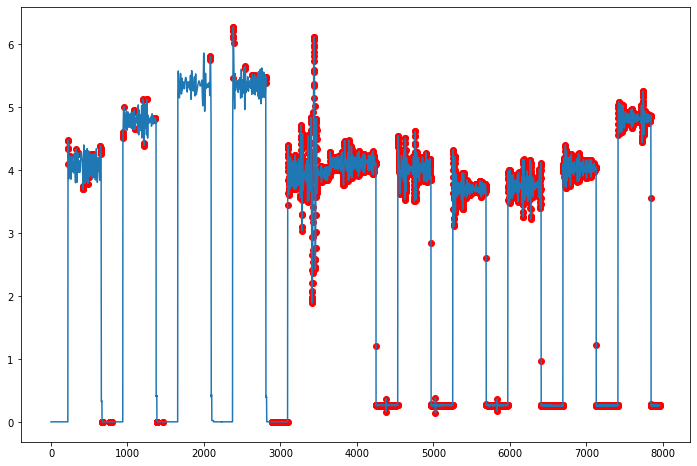

In [28]:
df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Суточные данные, одна размерность, без EMD 
Трейн на всех

[ 756 1473 2189 2904 3620]
756 1473 0
1473 2189 1
2189 2904 2
2904 3620 3


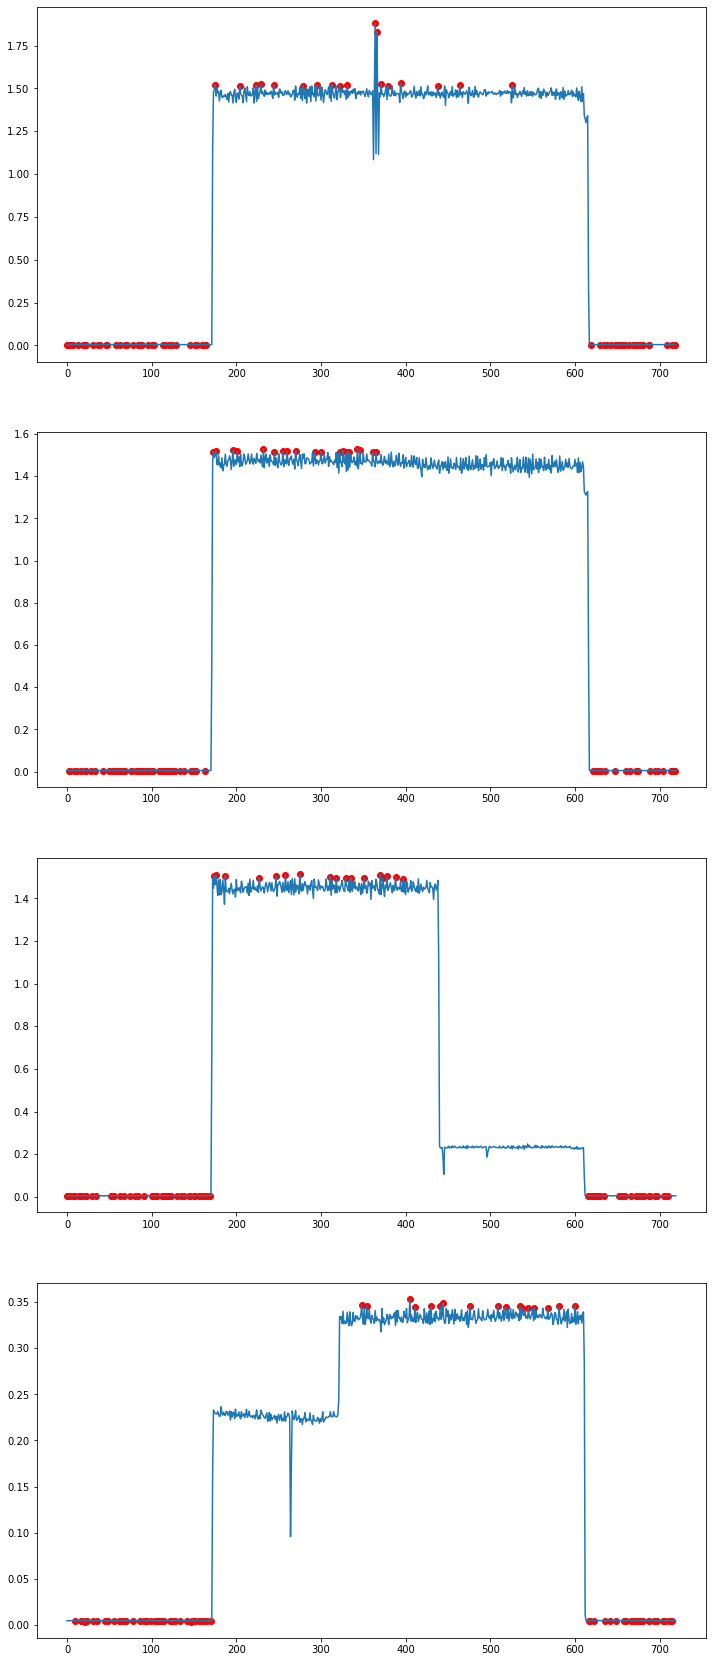

In [33]:
df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)

i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    preds = ocsvm.predict(day[:, np.newaxis])
    #print(preds)

    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, одна размерность, с EMD 
Трейн на всех

1473
0 1473
209 1370 0
2189
1473 2189
1641 2086 1
2904
2189 2904
2356 2795 2
3620
2904 3620
3074 3512 3
[ 756 1473 2189 2904 3620]

C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs


756 1473 0
1473 2189 1
2189 2904 2
2904 3620 3
(4, 720)


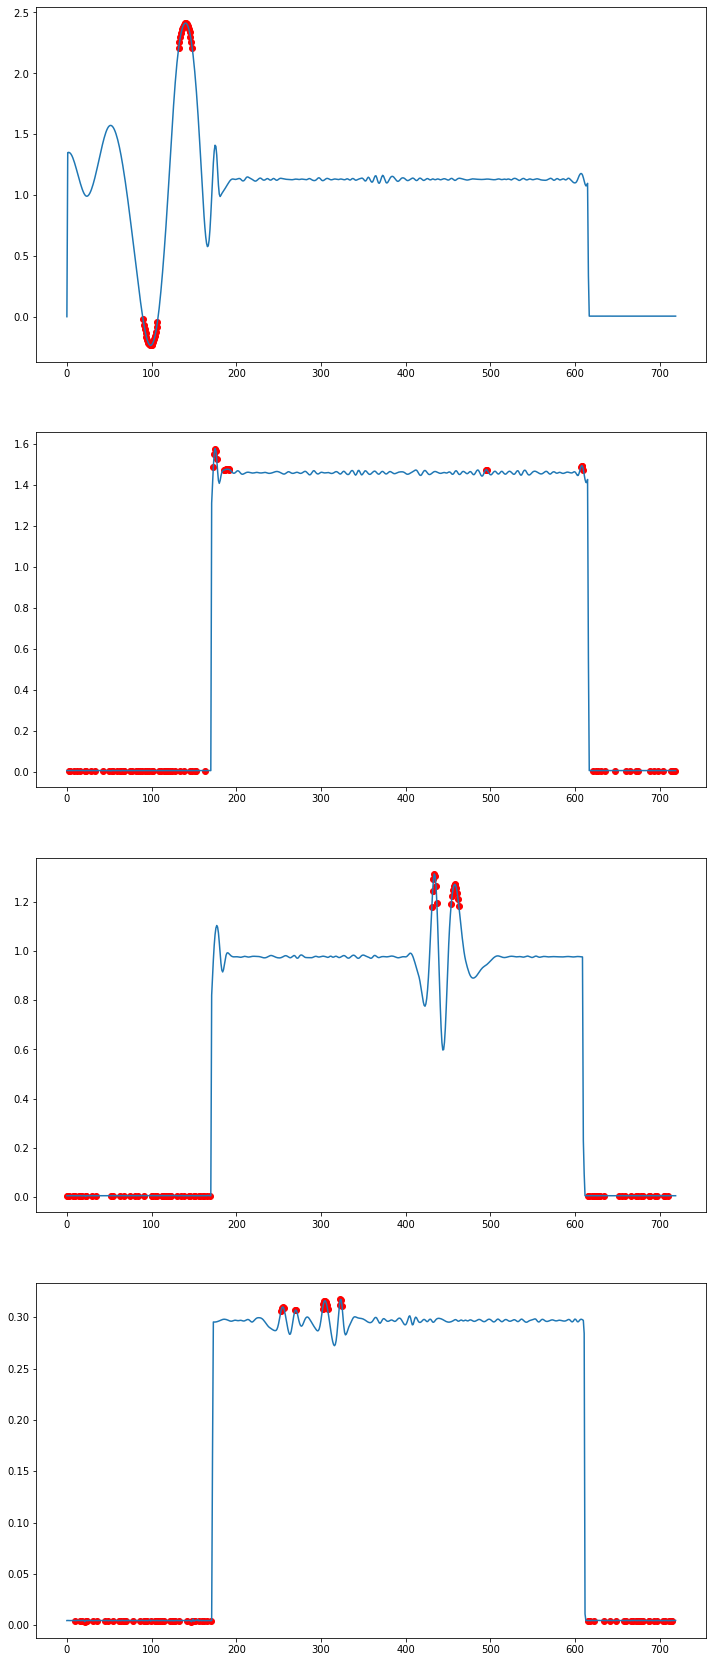

In [34]:
df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    preds = ocsvm.predict(day[:, np.newaxis])
    #print(preds)

    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, без EMD 
Трейн на всех

(4, 720, 5)


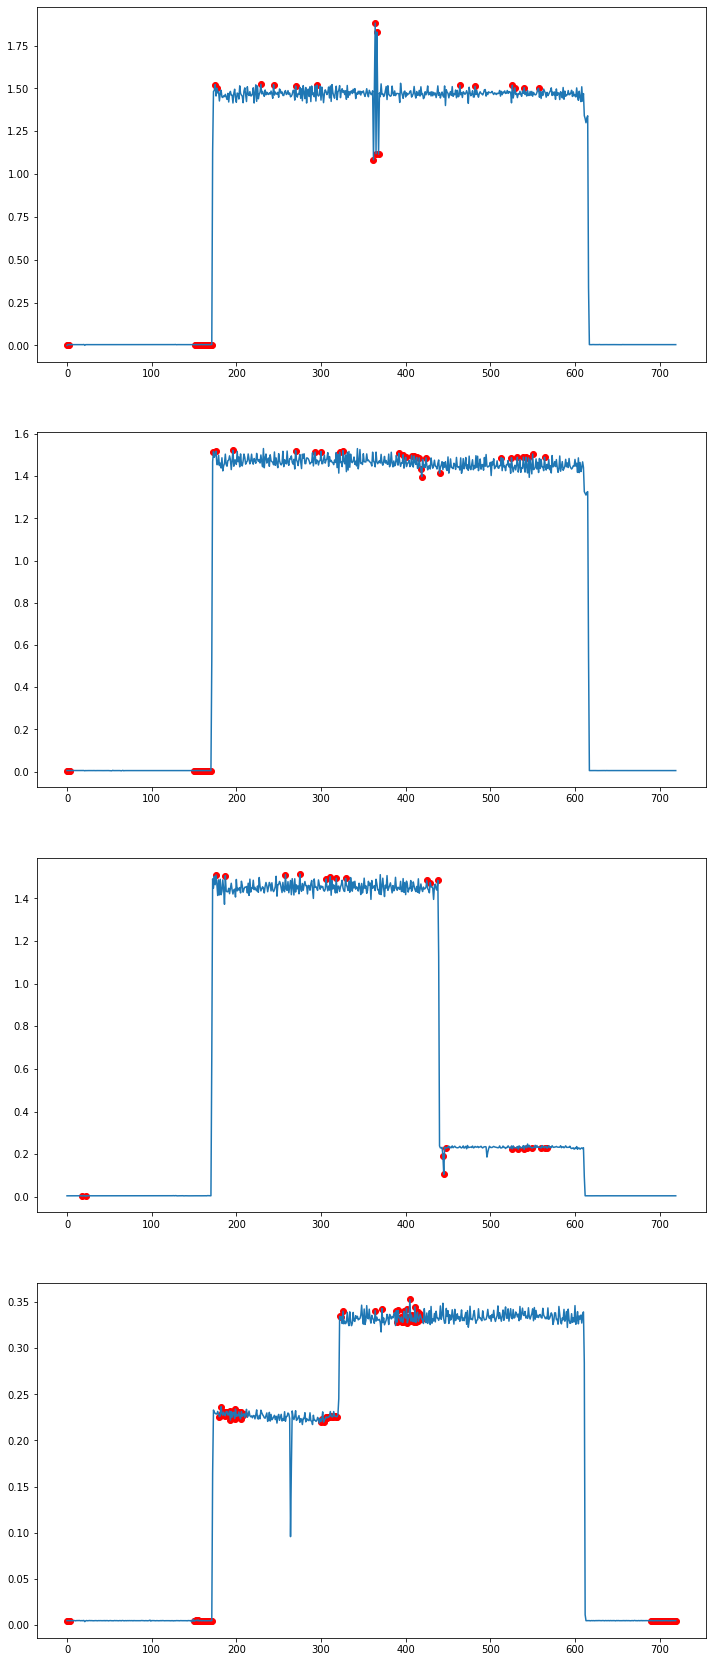

In [35]:
df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

    ax[i].plot(np.arange(len(day)), day[:, 0])
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red')
    i += 1

### Суточные данные, мульти размерность, с EMD 
Трейн на всех

1473
0 1473
209 1370 0
2189
1473 2189
1641 2086 1
2904
2189 2904
2356 2795 2
3620
2904 3620
3074 3512 3


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

(4, 720, 5)


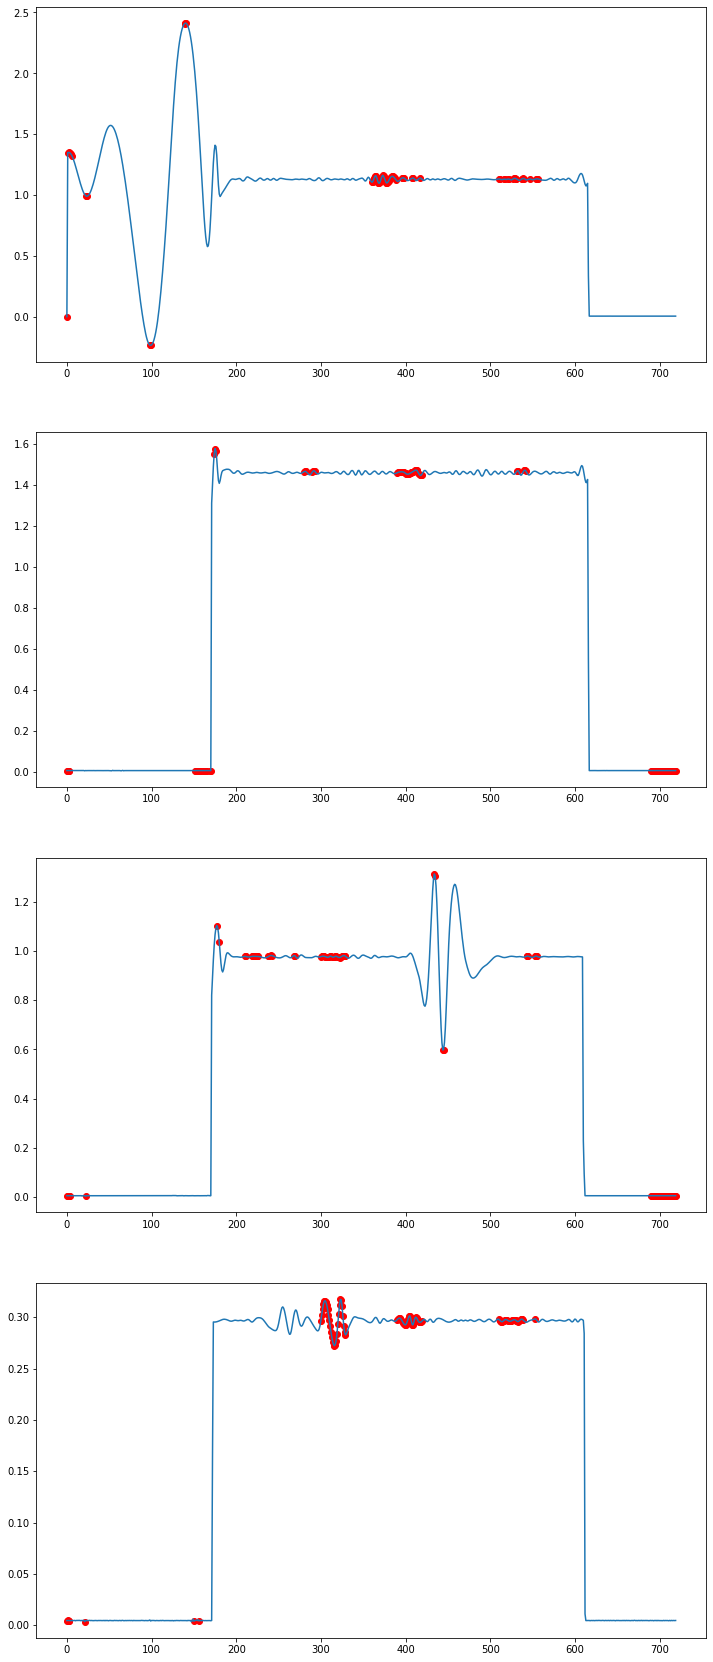

In [36]:
df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

    ax[i].plot(np.arange(len(day)), day[:, 0])
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red')
    i += 1

### Суточные данные, одна размерность, без EMD 
Трейн на норм

[ 756 1473 2189]
756 1473 0
1473 2189 1
(2, 720)
[ 756 1473 2189 2904 3620]
756 1473 0
1473 2189 1
2189 2904 2
2904 3620 3


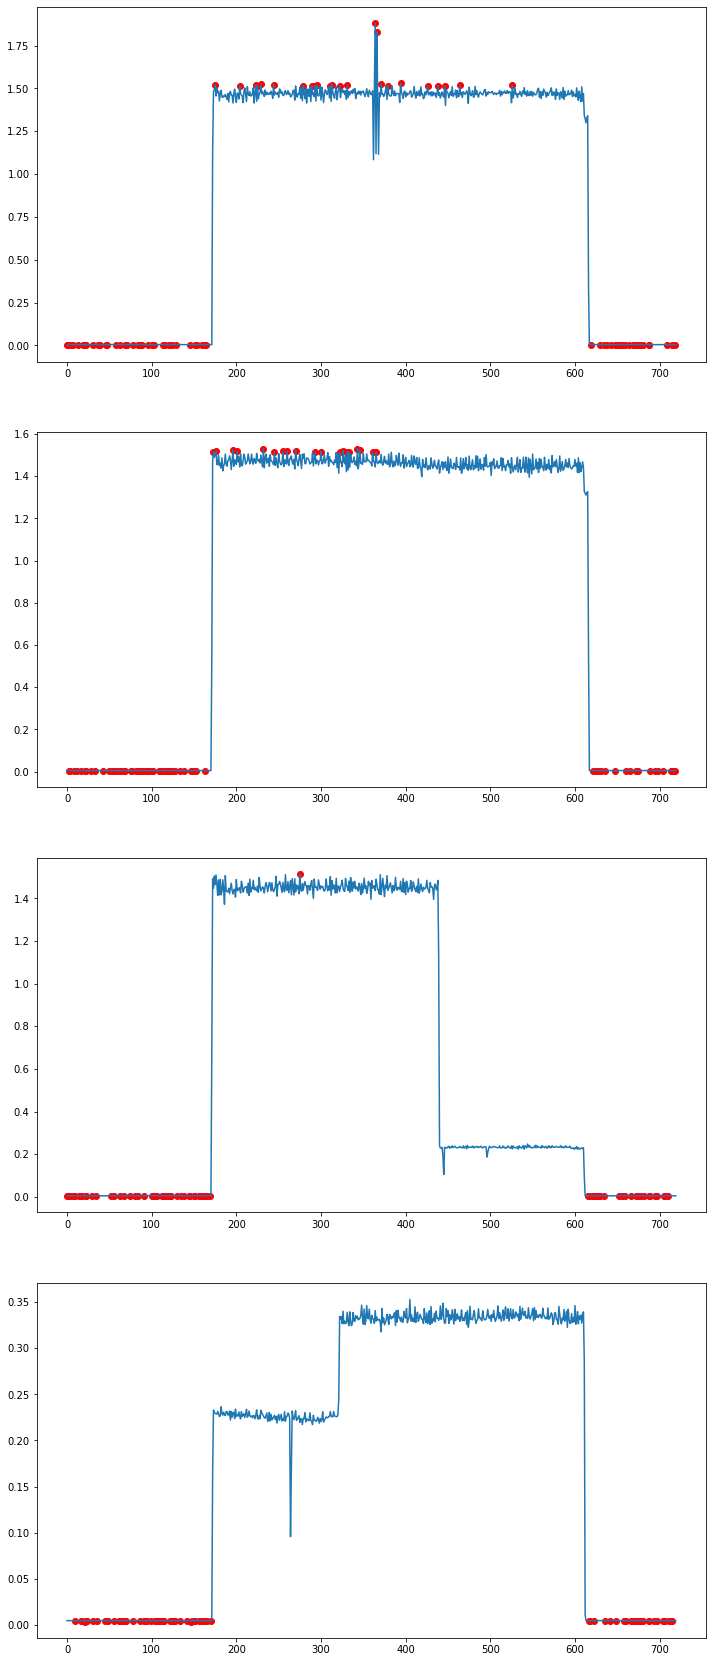

In [37]:
df = get_data(anom.loc[164019 - 730 * 3:164019].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    
    #print(preds)

df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    preds = ocsvm.predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

[  48  766 1483 2201 2919]
48 766 0
766 1483 1
1483 2201 2
2201 2919 3


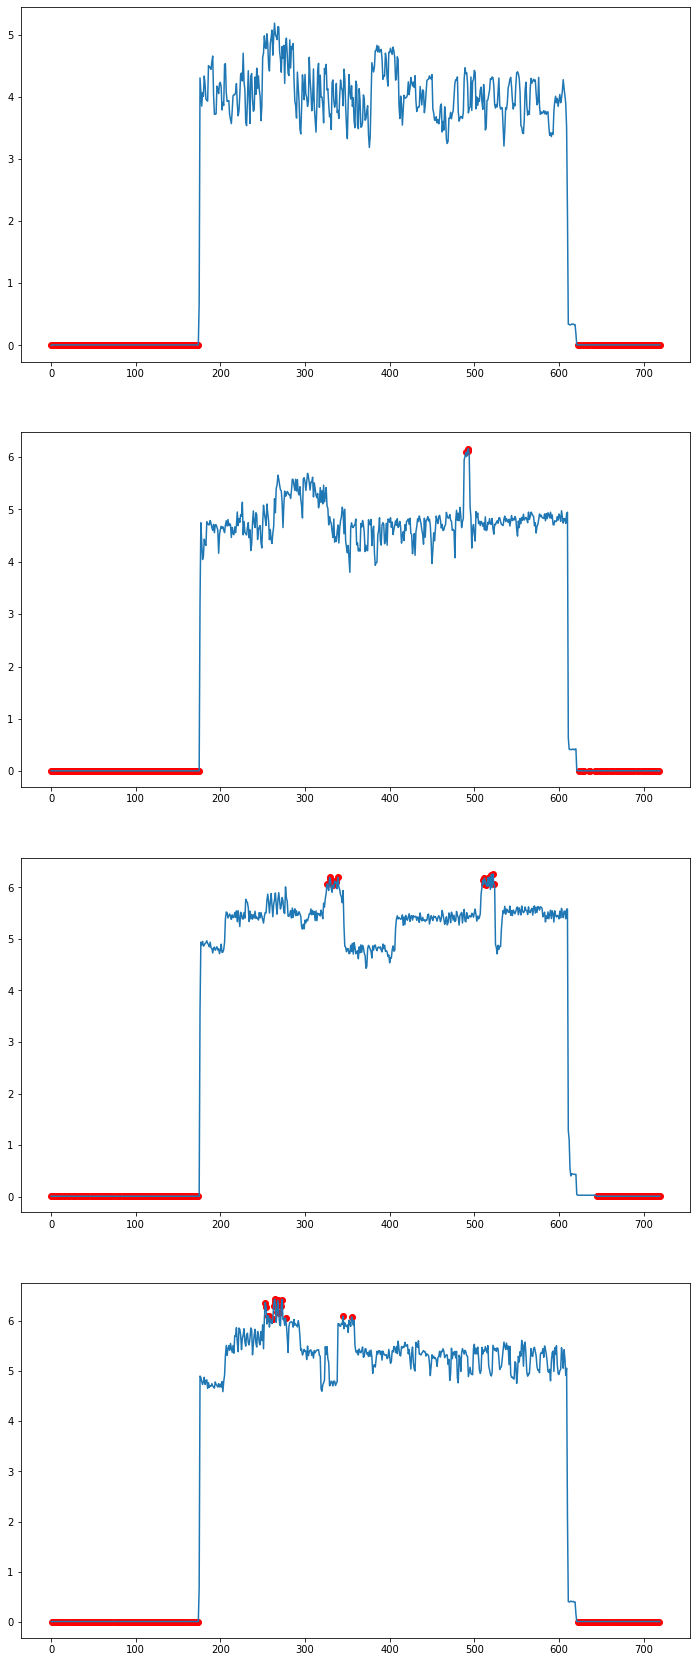

In [36]:
df = get_data(anom.loc[335773 - 730 * 4:335773].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
i =0
for day in df:
    preds = ocsvm.predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, одна размерность, с EMD 
Трейн на норм

1473
0 1473
209 1370 0
2189
1473 2189
1641 2086 1
[ 756 1473 2189]
756 1473 0
1473 2189 1
(2, 720)
1473
0 1473


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

209 1370 0
2189
1473 2189
1641 2086 1
2904
2189 2904
2356 2795 2
3620
2904 3620
3074 3512 3
[ 756 1473 2189 2904 3620]
756 1473 0
1473 2189 1
2189 2904 2
2904 3620 3


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


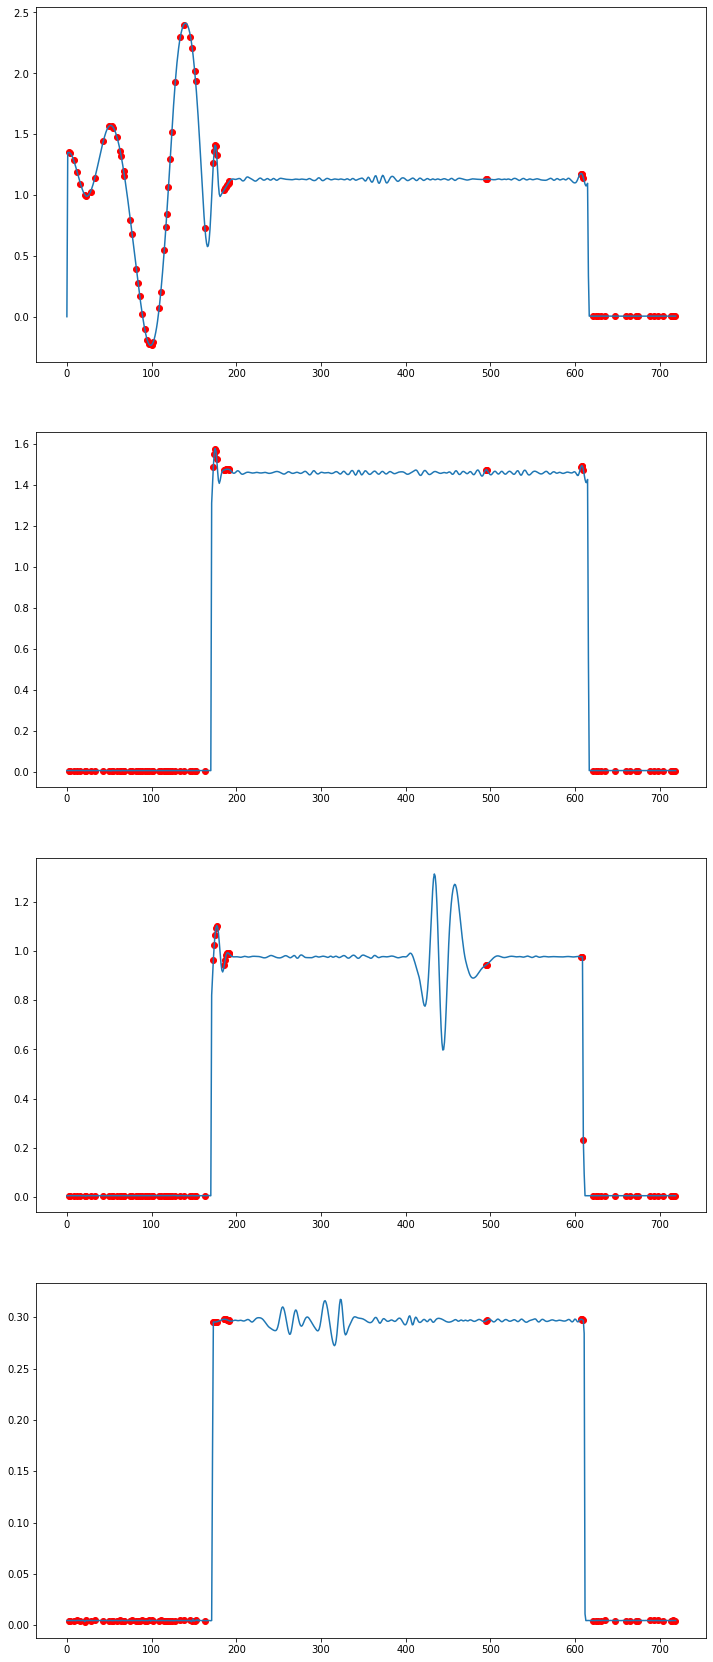

In [38]:
df = get_data(anom.loc[164019 - 730 * 3:164019].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    preds = ocsvm.predict(day[:, np.newaxis])
    #print(preds)

df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
[  48  766 1483 2201 2919]
48 766 0
766 1483 1
1483 2201 2
2201 2919 3


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

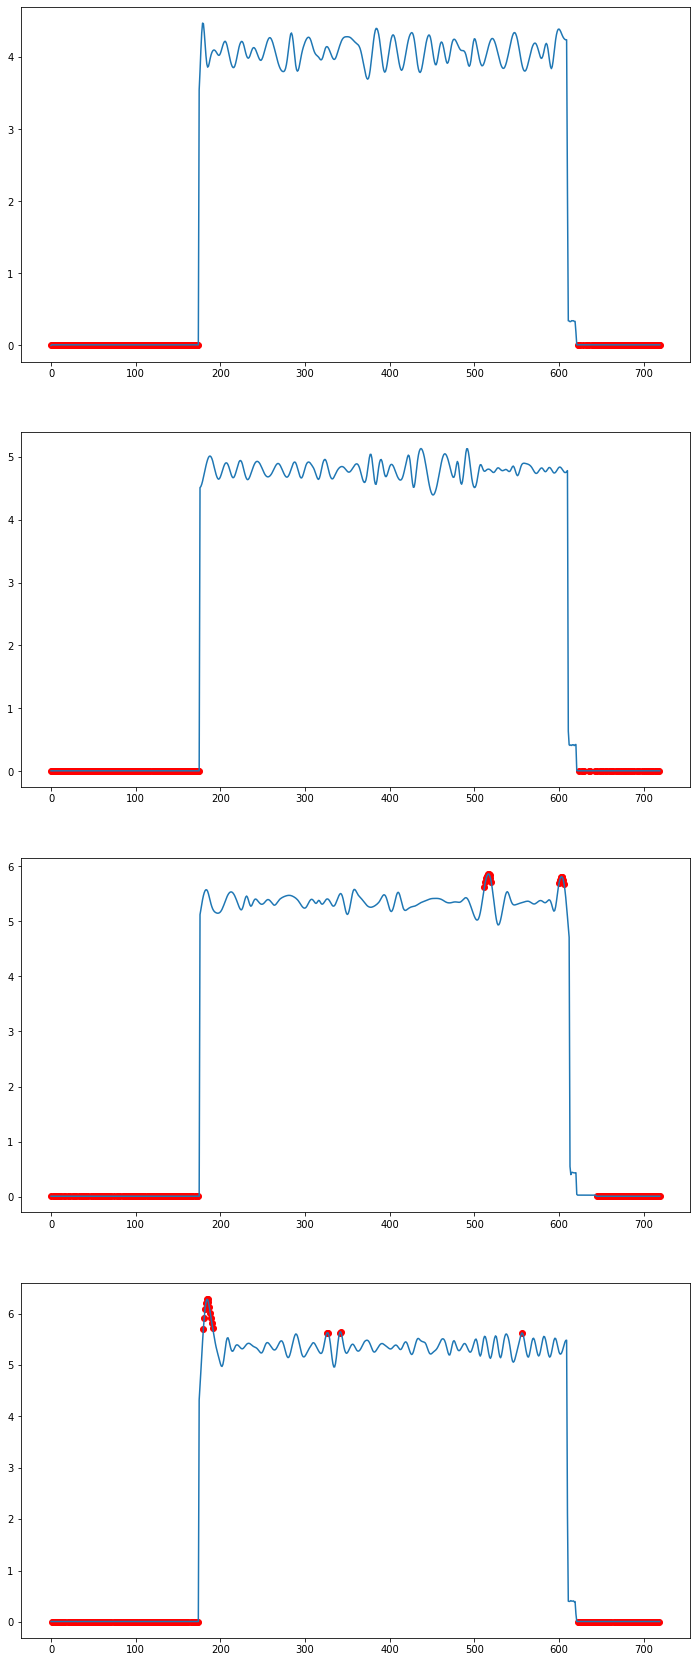

In [38]:
df = get_data(anom.loc[335773 - 730 * 4:335773].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
i =0
for day in df:
    preds = ocsvm.predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, без EMD 
Трейн на норм

[ 756 1473 2189 2904 3620]
756 1473 0
1473 2189 1
2189 2904 2
2904 3620 3


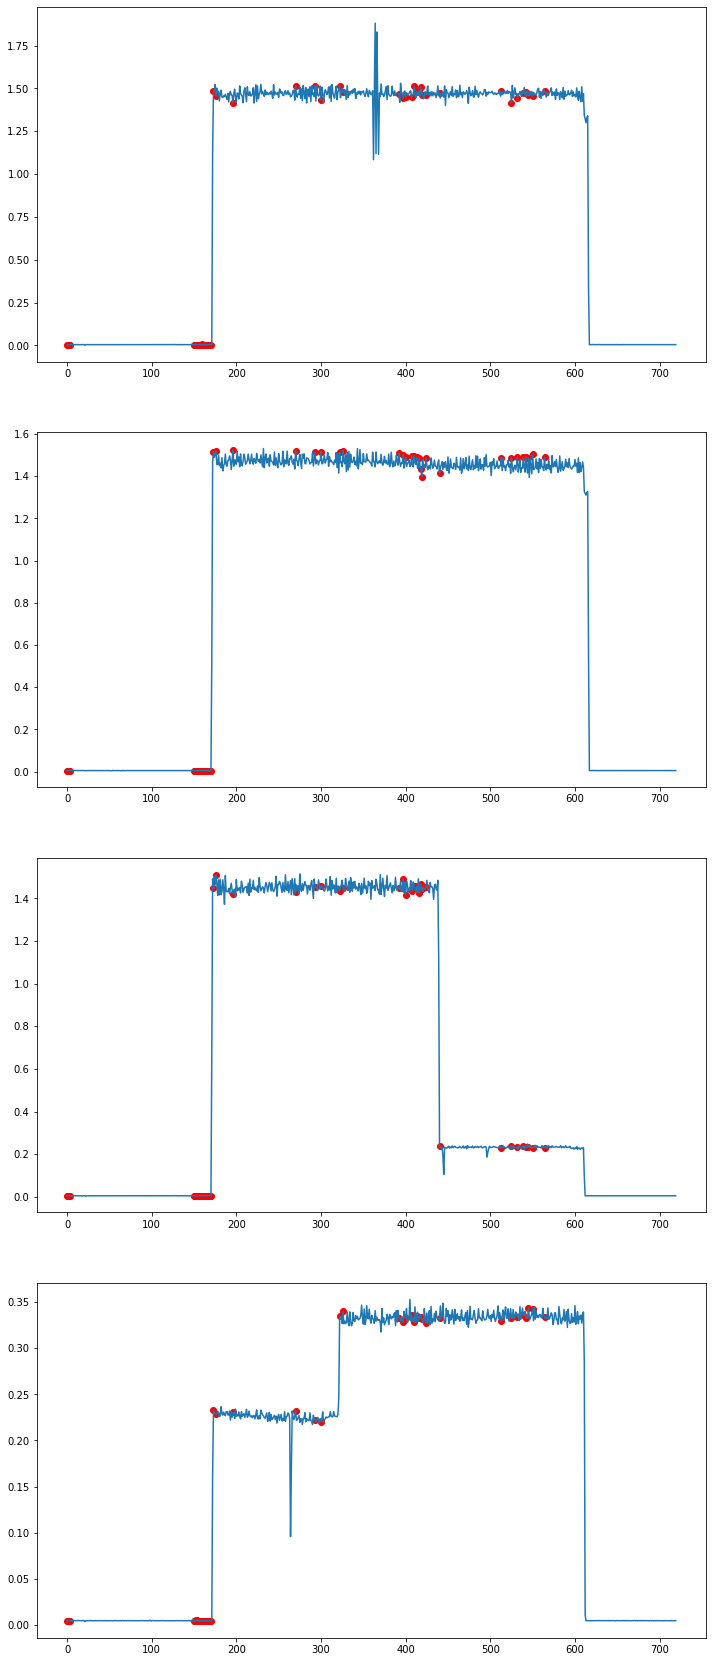

In [40]:
df = get_data(anom.loc[164019 - 730 * 3:164019].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, с EMD 
Трейн на норм

1473
0 1473
209 1370 0
2189
1473 2189
1641 2086 1
1473
0 1473


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

209 1370 0
2189
1473 2189
1641 2086 1
2904
2189 2904
2356 2795 2
3620
2904 3620
3074 3512 3
[ 756 1473 2189 2904 3620]
756 1473 0
1473 2189 1
2189 2904 2
2904 3620 3


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation5.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


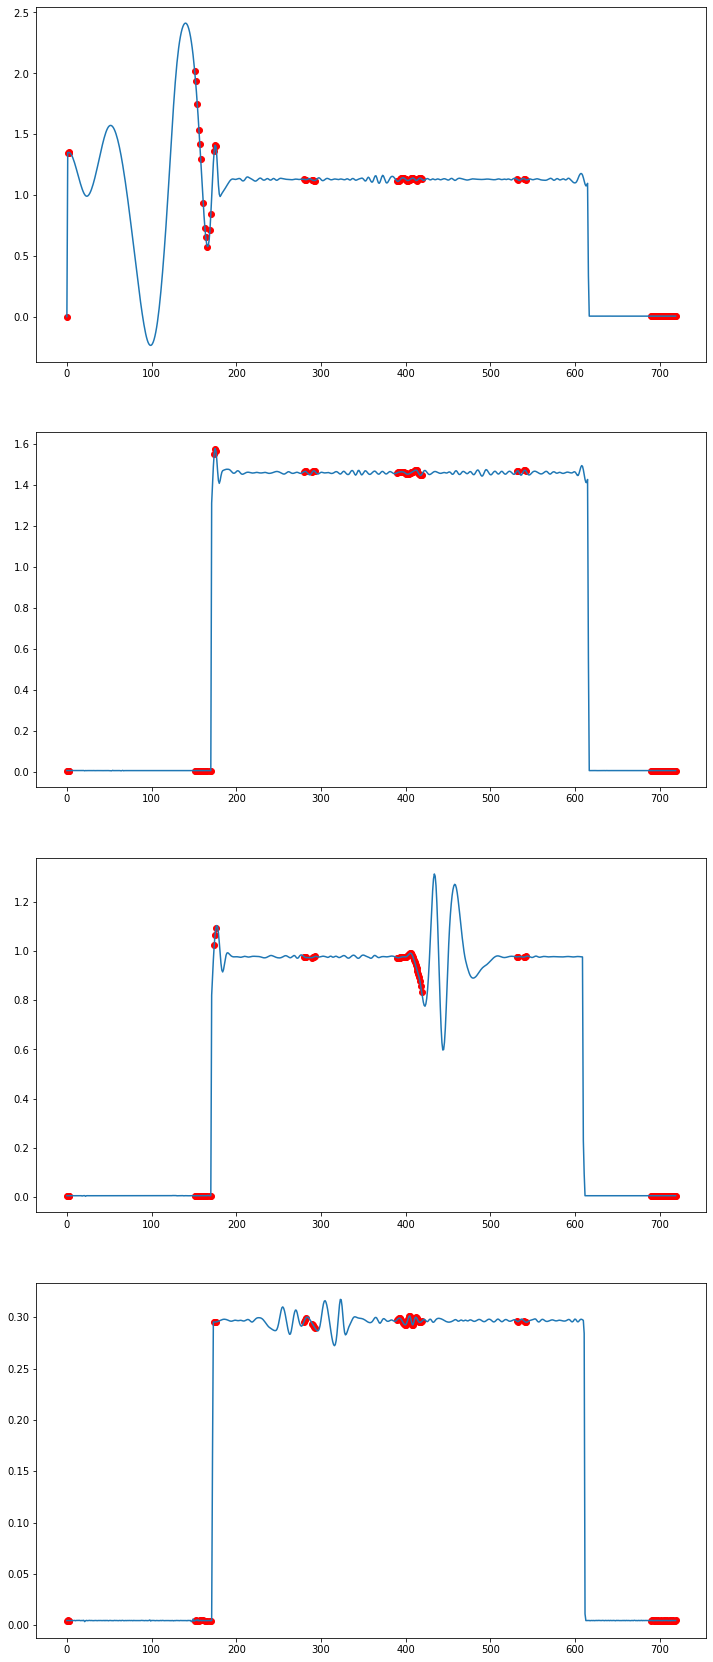

In [41]:
df = get_data(anom.loc[164019 - 730 * 3:164019].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

df = get_data(anom.loc[164019 - 730 * 3:164019 + 720 * 2].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1